# Week 6 Lab Assignment (Part 2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


In [2]:
from sqlalchemy import create_engine

#### My first step here is to load in my data.

In [3]:
host = r'127.0.0.1'
db = r'MSDS610'
user = r'postgres'
pw = r'MacMVP2025$' 
port = r'5432'

In [4]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))


In [5]:
table_name = r'real_clean'
schema = r'analytic'

real_clean2 = pd.read_sql_table(table_name, db_conn, schema)


#### I found that I was able to save my model and bring it over with joblib but it wouldn't run without retraining the data. I will do that in these next few cells.

In [6]:
cols = real_clean2.columns


prediction_col = 'Non Use Code'
feature_cols = [c for c in cols if c != prediction_col]
X = real_clean2[feature_cols]
y = real_clean2[prediction_col]

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [8]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, random_state=42, test_size=0.5, stratify=y_temp)

#### From here I will just need to load my model and create predictions based on it.

In [9]:
rf_model = joblib.load("real_clean_rf.joblib")

In [10]:
yv_predict = rf_model.predict(X_val)

In [11]:
yv_predict

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [12]:
accuracy_score(y_val, yv_predict)

0.8947368421052632

#### It looks like I lost a few percentage points on my accuracy score but it still looks very good. The next thing I need to do is get my predictions ready to upload to PostgreSQL. Since I'm unable to upload the array by itself, I'm going to add predictions to my dataframe and upload a table with a predictions column. To do that, I will have to rerun the predict function on the full dataset. Then, I'll just need to upload the table.

In [15]:
yv_predict2 = rf_model.predict(X)

real_clean2['Predictions'] = yv_predict2

In [18]:
real_clean2.head()

,List Year,Non Use Code,Assessed Value,Sale Amount,Sales Ratio,Overpriced,Predictions
0,2002,0.0,81960.0,140000.0,0.585429,1,0.0
1,2002,0.0,9900.0,5000.0,1.980000,0,0.0
2,2007,0.0,856440.0,1575000.0,0.543771,1,0.0
3,2018,1.0,735700.0,1100000.0,0.668818,0,1.0
4,2003,0.0,83900.0,130000.0,0.645385,1,0.0


In [19]:
host = r'127.0.0.1'
db = r'MSDS610'
user = r'postgres'
pw = r'MacMVP2025$' 
port = r'5432'
schema = r'analytic' 

In [20]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [21]:
table_name = r'predictions'

In [22]:
real_clean2.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')


250

#### Table upload was successful! Below is a screenshot of my new table titled "predictions".

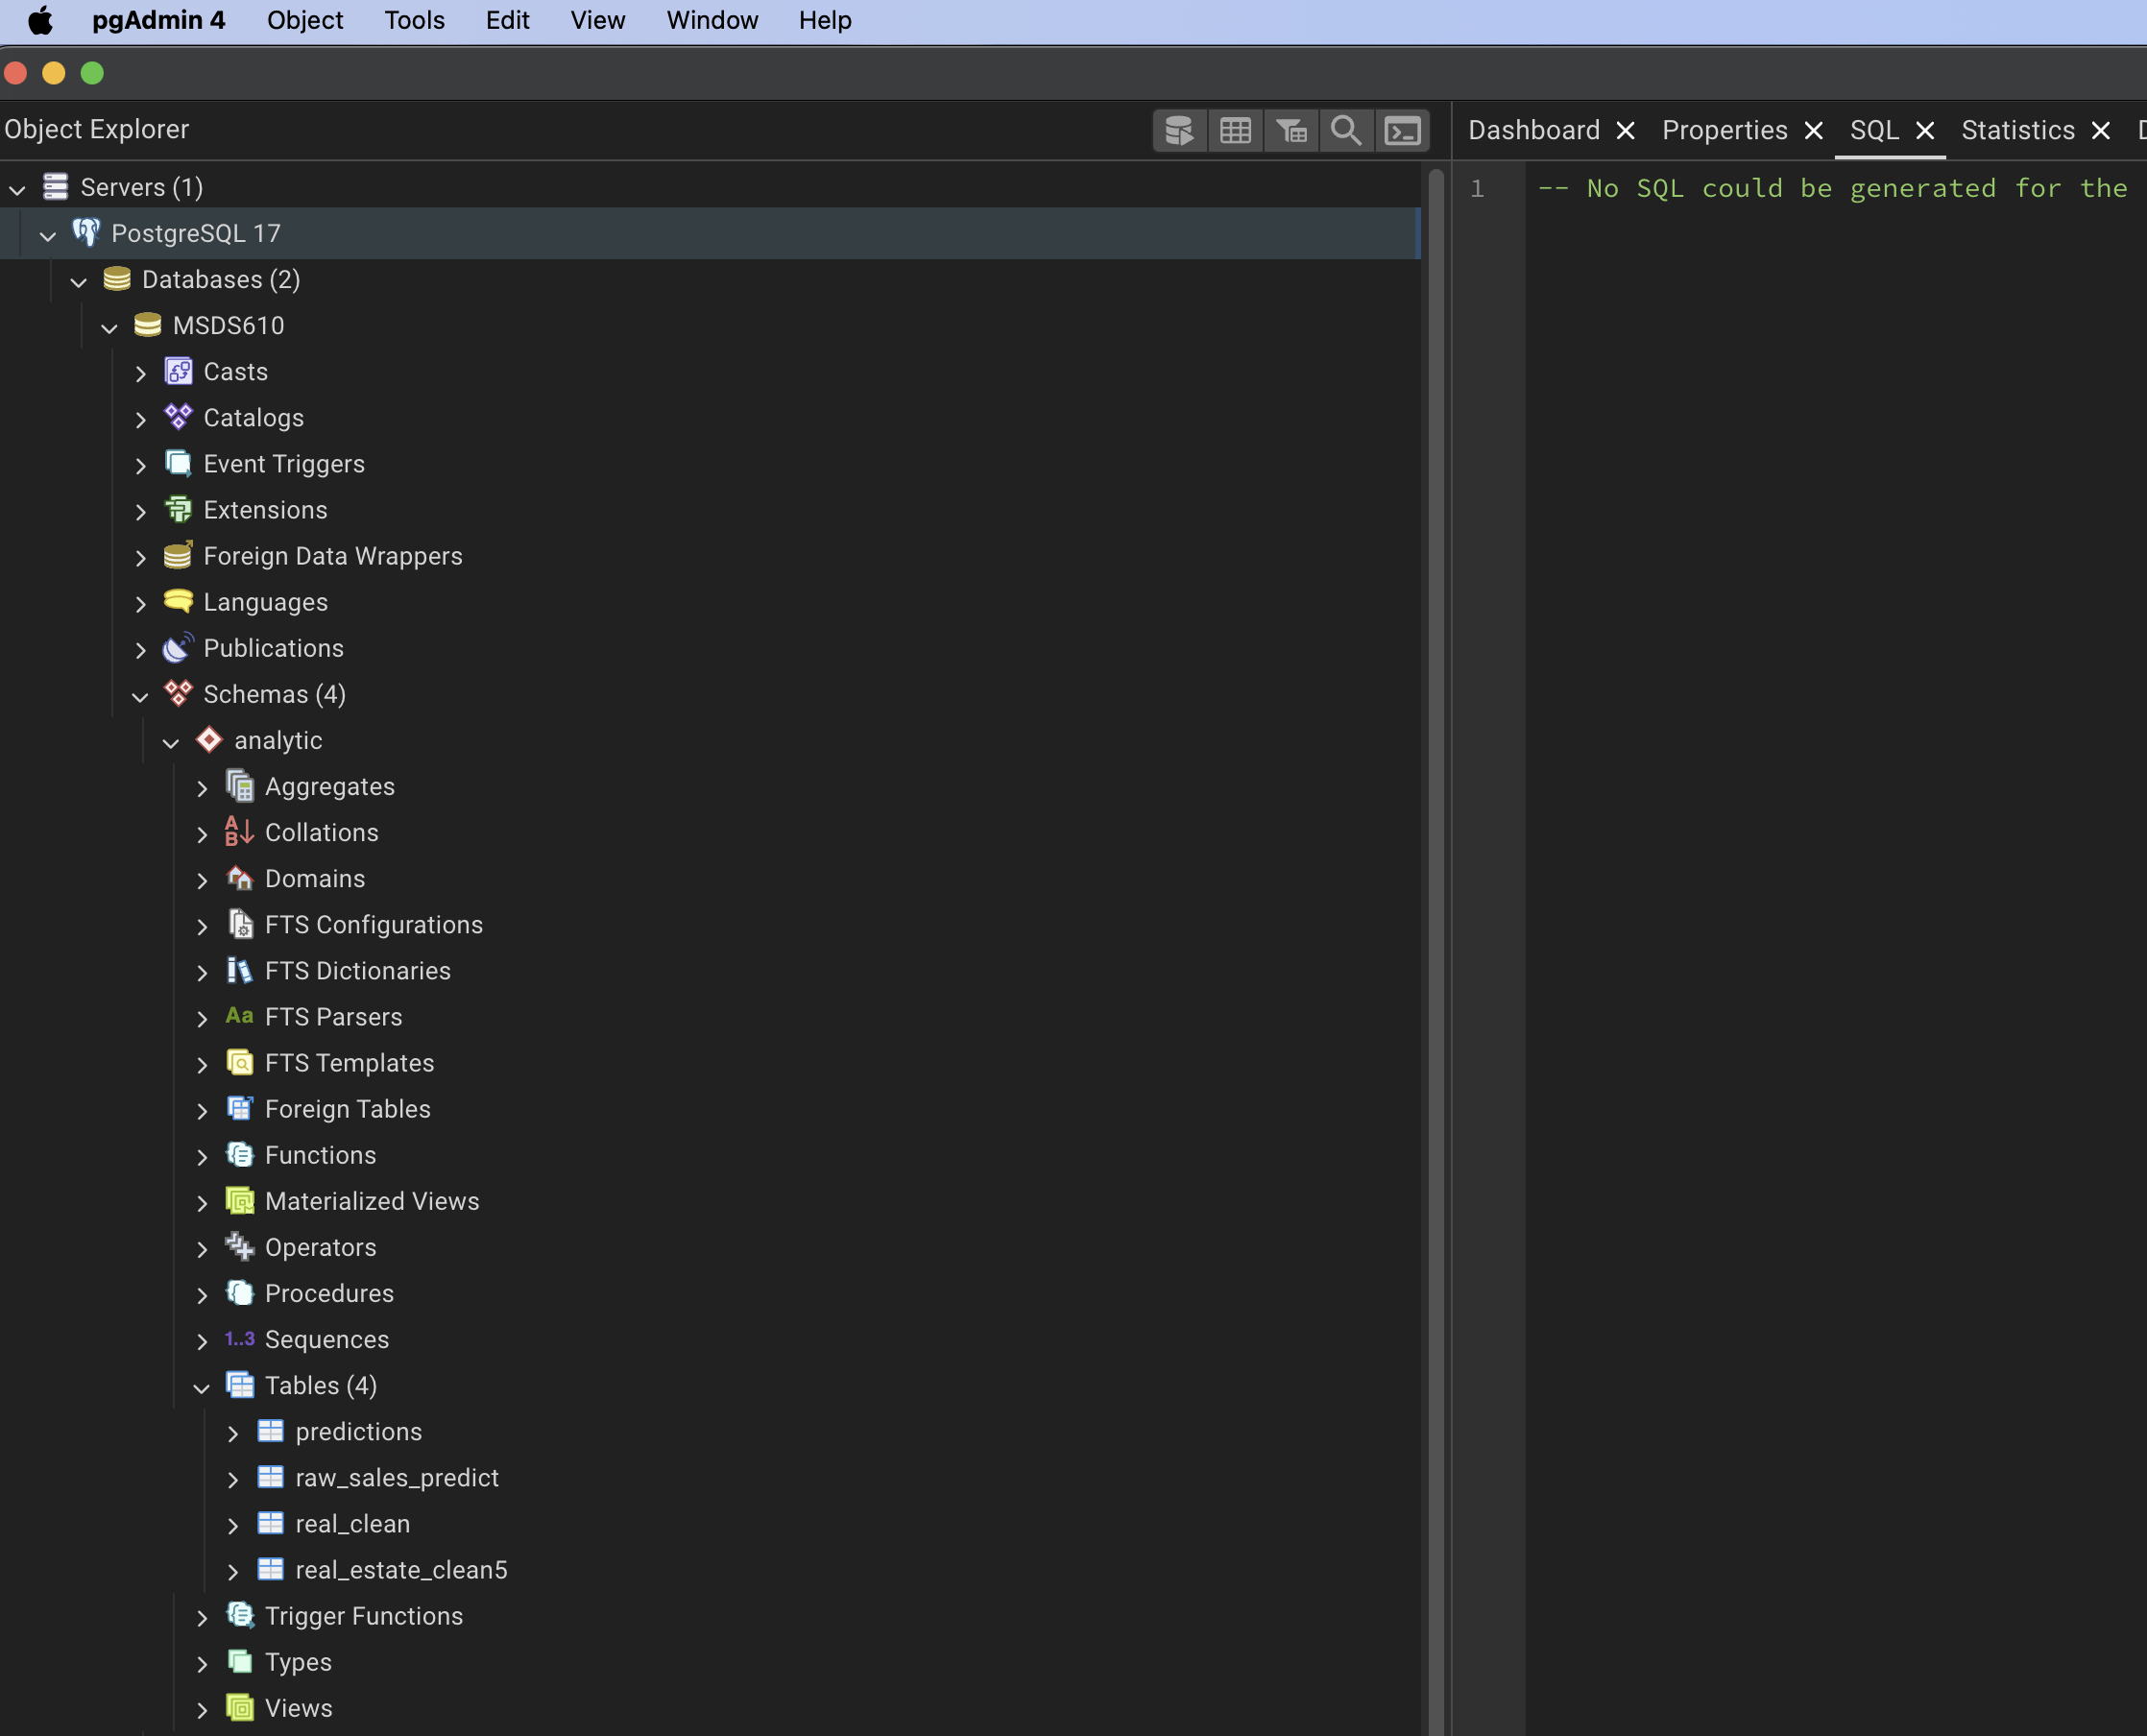

In [23]:
real_clean2.head(25)

,List Year,Non Use Code,Assessed Value,Sale Amount,Sales Ratio,Overpriced,Predictions
0,2002,0.0,81960.0,140000.0,0.585429,1,0.0
1,2002,0.0,9900.0,5000.0,1.980000,0,0.0
2,2007,0.0,856440.0,1575000.0,0.543771,1,0.0
3,2018,1.0,735700.0,1100000.0,0.668818,0,1.0
4,2003,0.0,83900.0,130000.0,0.645385,1,0.0
5,2005,0.0,105070.0,240000.0,0.437792,1,0.0
6,2014,0.0,19400.0,17500.0,1.108571,0,0.0
7,2005,0.0,71340.0,128000.0,0.557344,1,0.0
8,2005,0.0,184170.0,420000.0,0.438500,1,0.0
9,2003,0.0,41090.0,45876.0,0.895675,0,0.0


# Summary

#### I think I was pretty fortunate to have cleaned this data thoroughly. Maybe even a bit too thoroughly. But when building my model based on my cleaned data and the parameters I provided, the model is running with a high accuracy score. From looking at the dataframe with predictions, it also looks like the model is working well to predict which properties were foreclosed on.